In [1]:
from astropy.wcs import WCS
import astropy.units as u
from astropy.io import fits
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
def plot_user_input(fits_filename, tick_spacing, x_tick_position, y_tick_position, unit_x_axis = None, unit_y_axis = None,
               tick_style = None, xlabel = None, ylabel = None ):
    
    hdu = fits.open(fits_filename)[0]
    wcs = WCS(hdu.header)
    
    fig = plt.figure(figsize=(6,6))
    ax = fig.add_axes([0.15, 0.1, 0.8, 0.8], projection=wcs)
    
    ax.imshow(hdu.data, cmap=plt.cm.gist_heat, 
              origin='lower')

    
    lon = ax.coords[0]
    lat = ax.coords[1]
    
    if(unit_x_axis == None):
        unit_x_axis = wcs.wcs.cunit[0]
        lat.set_format_unit(unit_x_axis)
    else:
        lat.set_format_unit(u.Unit(unit_x_axis))
    
    if(unit_y_axis == None):
        unit_y_axis = wcs.wcs.cunit[1]
        lon.set_format_unit(unit_y_axis)
    else:
        lon.set_format_unit(u.Unit(unit_y_axis))
    
    if(tick_style == None):
        ax.ticklabel_format(style='sci')
    else:
        ax.ticklabel_format(style=tick_style)
            
    if(xlabel == None):
        lat.set_axislabel('Galactic Latitude')
    else:
        lat.set_axislabel(xlabel)
        
    if(ylabel == None):
        lon.set_axislabel('Galactic Longitude')
    else:
        lon.set_axislabel(ylabel)
        
    lon.set_axislabel_position(x_tick_position)
    lat.set_axislabel_position(y_tick_position)
        
    lon.set_ticks(spacing=tick_spacing * u.arcsec, color='white', exclude_overlapping=True)
    lat.set_ticks(spacing=tick_spacing * u.arcsec, color='white', exclude_overlapping=True)      


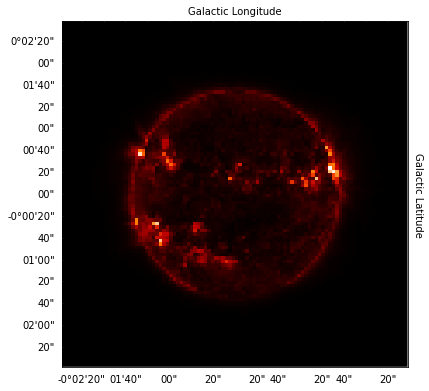

In [4]:
plot_user_input('resampled2_swap.fits',20, 't', 'r')